In [ ]:
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Introduccion#
El índice publicado en Economic Freedom of the World por el Instituto Fraser mide el grado en que las políticas e instituciones de los países apoyan la libertad económica. Las piedras angulares de la libertad económica son la elección personal, el intercambio voluntario, la libertad de entrar en los mercados y competir, y la seguridad de la persona y la propiedad privada. Se utilizan cuarenta y dos puntos de datos para construir un índice resumen y para medir el grado de libertad económica en cinco áreas amplias.


Área 1: Tamaño del gobierno - A medida que el gasto público, los impuestos y
el tamaño de las empresas controladas por el gobierno aumenta, el gobierno
la toma de decisiones se sustituye por la elección individual y económica
se reduce la libertad.

Área 2: Régimen Jurídico y Derechos de Propiedad - Protección de las personas y
su propiedad legítimamente adquirida es un elemento central de ambos
libertad económica y sociedad civil. De hecho, es el más importante
función de gobierno.

Área 3: Dinero sólido - La inflación erosiona el valor de lo ganado legítimamente
salarios y ahorros. El dinero sólido es, por lo tanto, esencial para proteger la propiedad.
derechos. Cuando la inflación no solo es alta sino también volátil, se vuelve
difícil para las personas planificar para el futuro y, por lo tanto, utilizar
la libertad económica de manera efectiva.

Área 4: Libertad de Comercio Internacional - Libertad de intercambio en su
sentido más amplio, comprar, vender, hacer contratos, etc., es
esencial para la libertad económica, que se reduce cuando la libertad de
intercambio no incluye empresas e individuos en otros
naciones

Área 5: Regulación - Los gobiernos no solo utilizan una serie de herramientas para
limitan el derecho a intercambiar internacionalmente, también pueden desarrollar
regulaciones onerosas que limitan el derecho a cambiar, ganar crédito,
contratar o trabajar para quien desee, u operar libremente su negocio.

In [ ]:
df_efw= pd.read_csv('/content/drive/MyDrive/coder data/efw_cc 2.csv',sep=',')
df_efw


,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,...,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,...,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


In [ ]:
df_efw[['3c_inflation','rank','countries']].head(5)

,3c_inflation,rank,countries
0,9.74360,34.0,Albania
1,8.72046,159.0,Algeria
2,3.05400,155.0,Angola
3,2.00000,160.0,Argentina
4,9.74600,29.0,Armenia


In [ ]:
df_efw.describe()













,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,3726.000000,3003.000000,3003.000000,3003.000000,3137.000000,2766.000000,3080.000000,2679.000000,3079.000000,2173.000000,...,3115.000000,3045.000000,2378.000000,3109.000000,3134.000000,3035.000000,3107.000000,2568.000000,2324.000000,2998.000000
mean,2001.347826,6.519640,68.307026,2.497835,5.862426,7.672901,5.737987,5.813177,6.232061,5.019474,...,7.660619,7.078796,6.332996,9.115282,4.376398,6.719849,7.732523,6.168449,6.188570,6.638470
std,12.735125,1.133638,41.343417,1.118963,2.270241,2.138957,3.242377,2.654083,1.447985,2.249670,...,1.812816,1.821355,1.712494,2.460966,2.694049,1.720183,2.123763,1.509150,1.268471,1.240397
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,2.009841,1.002000
25%,1995.000000,5.855000,33.000000,1.000000,4.450000,6.207809,4.000000,4.000000,5.229374,3.259067,...,6.604056,6.208800,5.462975,10.000000,2.000000,5.946710,6.800388,5.072882,5.386941,5.877893
50%,2005.000000,6.680000,66.000000,3.000000,6.082353,8.432251,7.000000,6.000000,6.319653,4.698028,...,7.968903,7.480000,6.592045,10.000000,4.768803,7.011524,8.305564,6.197257,6.169513,6.759404
75%,2011.000000,7.350000,102.000000,3.000000,7.571360,9.482289,8.000000,8.000000,7.267682,6.822563,...,9.257395,8.333483,7.515852,10.000000,6.493357,7.916308,9.333333,7.344125,7.007430,7.486336
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.816667,...,9.922187,10.000000,9.833333,10.000000,10.000000,10.000000,10.000000,9.725000,9.503739,9.439828


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

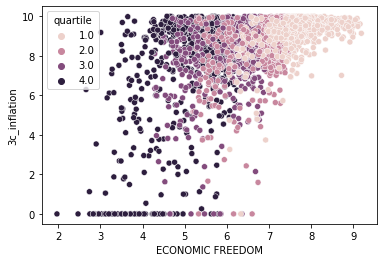

In [ ]:
sns.scatterplot(data=df_efw,x="ECONOMIC FREEDOM",y="3c_inflation",hue="quartile")

La base de datos en una de sus columnas esta divida en 4 quarlies, los cuales divide de quartil mas bajo a mas alto, los rankings de libertad economica, podemos visualizar en base a los datos su libertad economica respecto a su inflación.

Text(0, 0.5, 'Inflación')

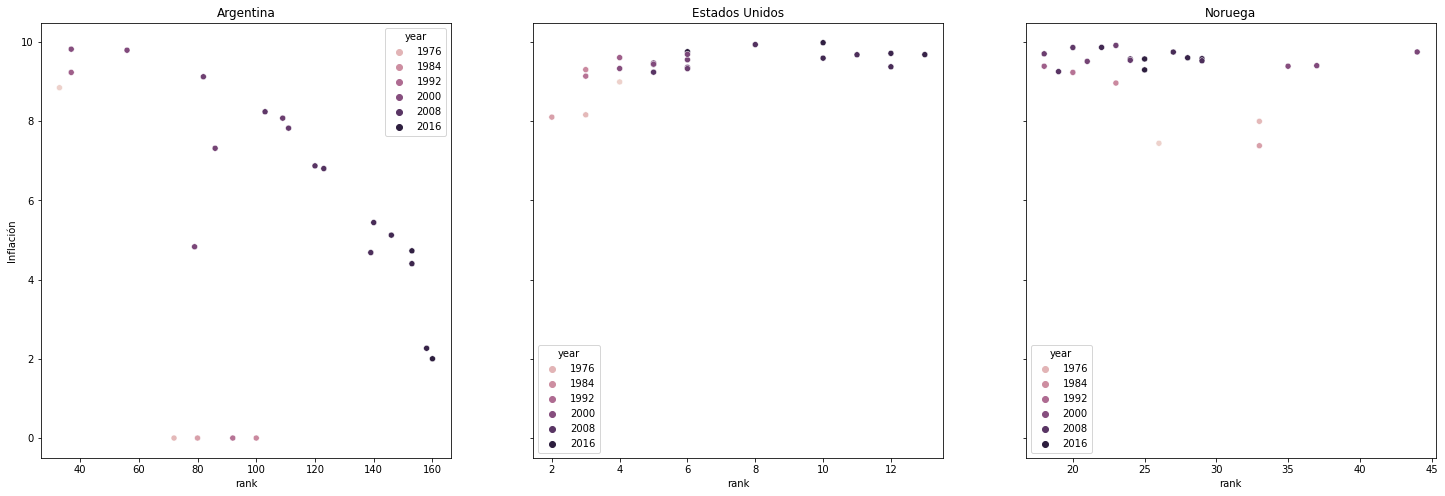

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8),
                       sharey=True)  

sns.scatterplot(data=df_efw.loc[df_efw.countries=='Argentina'],
            x='rank',
            y='3c_inflation', 
            hue='year',
            ax=ax[0],
             )

sns.scatterplot(data=df_efw.loc[df_efw.countries=='United States'],
            x='rank',
            y='3c_inflation', 
            hue='year',
            ax=ax[1],
             )

sns.scatterplot(data=df_efw.loc[df_efw.countries=='Norway'],
            x='rank',
            y='3c_inflation', 
            hue='year',
            ax=ax[2],
             )

ax[0].set_title('Argentina') 
ax[1].set_title('Estados Unidos') 
ax[2].set_title('Noruega')

ax[0].set_ylabel('Inflación') #filas

En esta línea de codigo se dispone a mostrar una comparativa entre 3 países, respecto a como varia su ranking dependiendo su inflación. Podemos visualizar como Argentina empeora aun que su inflación disminuya segun los datos presentados, como estados unidos mantiene su inflación pero no su ranking y como Noruega mejora en el ranking sin variar su inflación.

In [ ]:
df2=df_efw.loc[df_efw.countries=='Argentina']
rank=df2[['year','rank']].groupby(by='year').sum()
tamaño_gob=df2[['1_size_government','year']].groupby(by='year').sum()

Text(0, 0.5, 'Tamaño de estado')

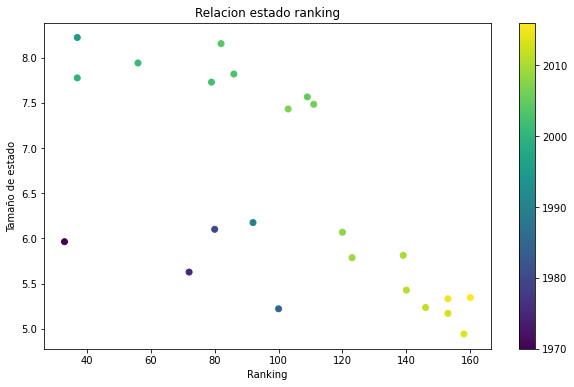

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
mapeo_colores = ax.scatter(rank, tamaño_gob, 
                          c=rank.index)#asigno colores a los valores del indice (años) con parametro c
fig.colorbar(mapeo_colores) #agrego una barra a la derecha con los colores de los años y las etiquetas respectivas

ax.set_title('Relacion estado ranking')
ax.set_xlabel('Ranking')
ax.set_ylabel('Tamaño de estado')

Acá podemos visualizar una clara baja en el ranking a medida que el tamaño del estado Argentino crece. Para realizar este gráfico tuve inconvenientes y tuve que definir la variable previamente ya que no me permitia realizarlo de otra manera

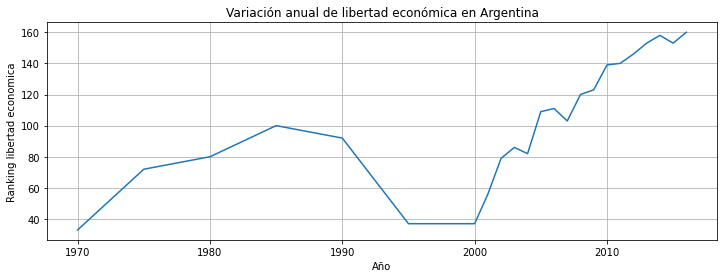

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # figsize: (ancho,alto) en pulgadas
ax.plot(rank.index, rank)

ax.set_xlabel('Año')                  
ax.set_ylabel('Ranking libertad economica')
ax.set_title('Variación anual de libertad económica en Argentina')
plt.grid()

Libertad económica de Argentina a traves del paso del tiempo. Me surgio la duda si se puede trabajar en base a otro pais sin necesidad de mencionarlo, porque puedo visualizar que siempre la linea de codigo sigue trabajando sobre argentina, no se si quiero trabajr en otro país como hacer sin necesidad de mencionarlo o definirlo.

# **UNIVARIADO**


In [ ]:
df_nuevo = df_efw[["rank", "year"]].groupby("year").max()
df_nuevo

,rank
year,
1970,54.0
1975,72.0
1980,104.0
1985,110.0
1990,113.0
1995,123.0
2000,123.0
2001,123.0
2002,123.0


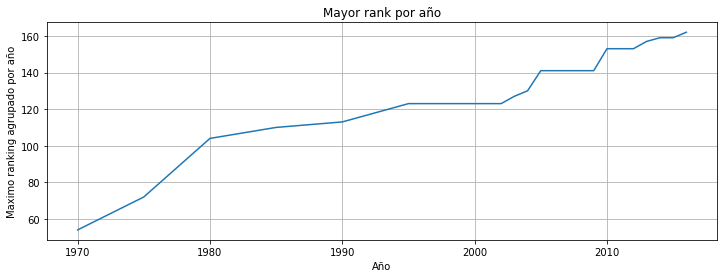

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # figsize: (ancho,alto) en pulgadas
ax.plot(df_nuevo)

ax.set_xlabel('Año')                  
ax.set_ylabel('Maximo ranking agrupado por año')
ax.set_title('Mayor rank por año')
plt.grid()

##**BIVARIADO**##

In [ ]:
df_nuevo11 = df_efw[["countries", "rank"]].groupby("countries").min()
df_nuevo11

,rank
countries,
Albania,34.0
Algeria,91.0
Angola,137.0
Argentina,33.0
Armenia,13.0
...,...
Venezuela,10.0
Vietnam,92.0
"Yemen, Rep.",95.0


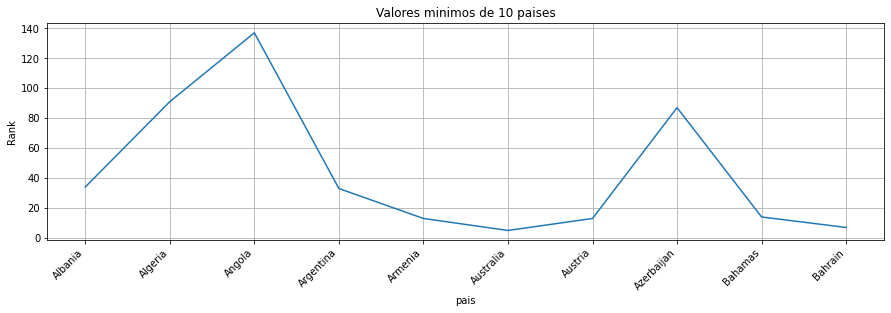

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(df_nuevo11.iloc[0:10])
plt.title('Valores minimos de 10 paises')
plt.xlabel('pais')
plt.ylabel('Rank')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


##**Pregunta posible**##
#¿hay correlación o algun tipo de causalidad en la libertad economica de un país con respecto a sus gastos, inflación, libertad de comerciar con el resto del mundo?#

In [ ]:
df_efw.isna().sum()


year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                       723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

In [ ]:
len(df_efw)

3726

##Como queiro predecir economic freedom, elimino los valores faltantes##

In [ ]:
df_efw = df_efw.dropna(subset=['ECONOMIC FREEDOM'])

In [ ]:
n=len(df_efw)
n

3003

In [ ]:
df_efw.isna().sum()

year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                         0
rank                                     0
quartile                                 0
1a_government_consumption                7
1b_transfers                           279
1c_gov_enterprises                      84
1d_top_marg_tax_rate                   342
1_size_government                        9
2a_judicial_independence               830
2b_impartial_courts                    456
2c_protection_property_rights          416
2d_military_interference               463
2e_integrity_legal_system              437
2f_legal_enforcement_contracts         650
2g_restrictions_sale_real_property     673
2h_reliability_police                 1349
2i_business_costs_crime               1349
2j_gender_adjustment                     0
2_property_rights                       55
3a_money_growth                         16
3b_std_infl

In [ ]:
df_efw = df_efw.dropna(subset=['1a_government_consumption',
                               '1_size_government',
                               '3b_std_inflation',
                               '3a_money_growth',
                               '3c_inflation',
                               '3d_freedom_own_foreign_currency',
                               '3_sound_money',
                               '4c_black_market',
                               '5a_credit_market_reg',
                               '5_regulation',
                               '4_trade',
                               '2_property_rights',
                               '4a_tariffs',
                               '1c_gov_enterprises'])
n1=len(df_efw)
n1

2803

In [ ]:
porcentaje=(1-(n1/n))*100
porcentaje

6.6600066600066565

In [ ]:
df_efw.isna().sum()


year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                         0
rank                                     0
quartile                                 0
1a_government_consumption                0
1b_transfers                           194
1c_gov_enterprises                       0
1d_top_marg_tax_rate                   261
1_size_government                        0
2a_judicial_independence               693
2b_impartial_courts                    333
2c_protection_property_rights          350
2d_military_interference               338
2e_integrity_legal_system              330
2f_legal_enforcement_contracts         511
2g_restrictions_sale_real_property     524
2h_reliability_police                 1201
2i_business_costs_crime               1201
2j_gender_adjustment                     0
2_property_rights                        0
3a_money_growth                          0
3b_std_infl

In [ ]:
df_efw


,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970,TWN,Taiwan,6.40,22.0,2.0,4.561765,10.000000,2.0,NaN,...,9.479197,5.733333,NaN,9.40000,2.000000,5.711111,3.698699,NaN,NaN,3.714163
3709,1970,THA,Thailand,6.20,25.0,2.0,7.668155,10.000000,6.0,NaN,...,6.708924,4.400000,NaN,10.00000,2.000000,5.466667,7.677678,NaN,NaN,5.092079
3713,1970,TUN,Tunisia,4.44,47.0,4.0,5.687737,8.988691,0.0,NaN,...,6.884312,3.533333,NaN,4.00000,0.000000,2.511111,5.449449,NaN,NaN,4.804833
3719,1970,USA,United States,7.77,4.0,1.0,5.108942,7.980926,8.0,0.0,...,9.588777,8.400000,NaN,10.00000,8.000000,8.800000,9.336003,4.347600,NaN,6.841801


In [ ]:
df_efw['2i_business_costs_crime'].describe()

count    1602.000000
mean        5.888211
std         1.859233
min         0.000000
25%         4.626946
50%         6.053691
75%         7.308297
max         9.597701
Name: 2i_business_costs_crime, dtype: float64

In [ ]:
df_efw['business_costs_crime'] = df_efw['2i_business_costs_crime'].fillna(df_efw['2i_business_costs_crime'].mean())
df_efw.isna().sum()


year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                         0
rank                                     0
quartile                                 0
1a_government_consumption                0
1b_transfers                           194
1c_gov_enterprises                       0
1d_top_marg_tax_rate                   261
1_size_government                        0
2a_judicial_independence               693
2b_impartial_courts                    333
2c_protection_property_rights          350
2d_military_interference               338
2e_integrity_legal_system              330
2f_legal_enforcement_contracts         511
2g_restrictions_sale_real_property     524
2h_reliability_police                 1201
2i_business_costs_crime               1201
2j_gender_adjustment                     0
2_property_rights                        0
3a_money_growth                          0
3b_std_infl

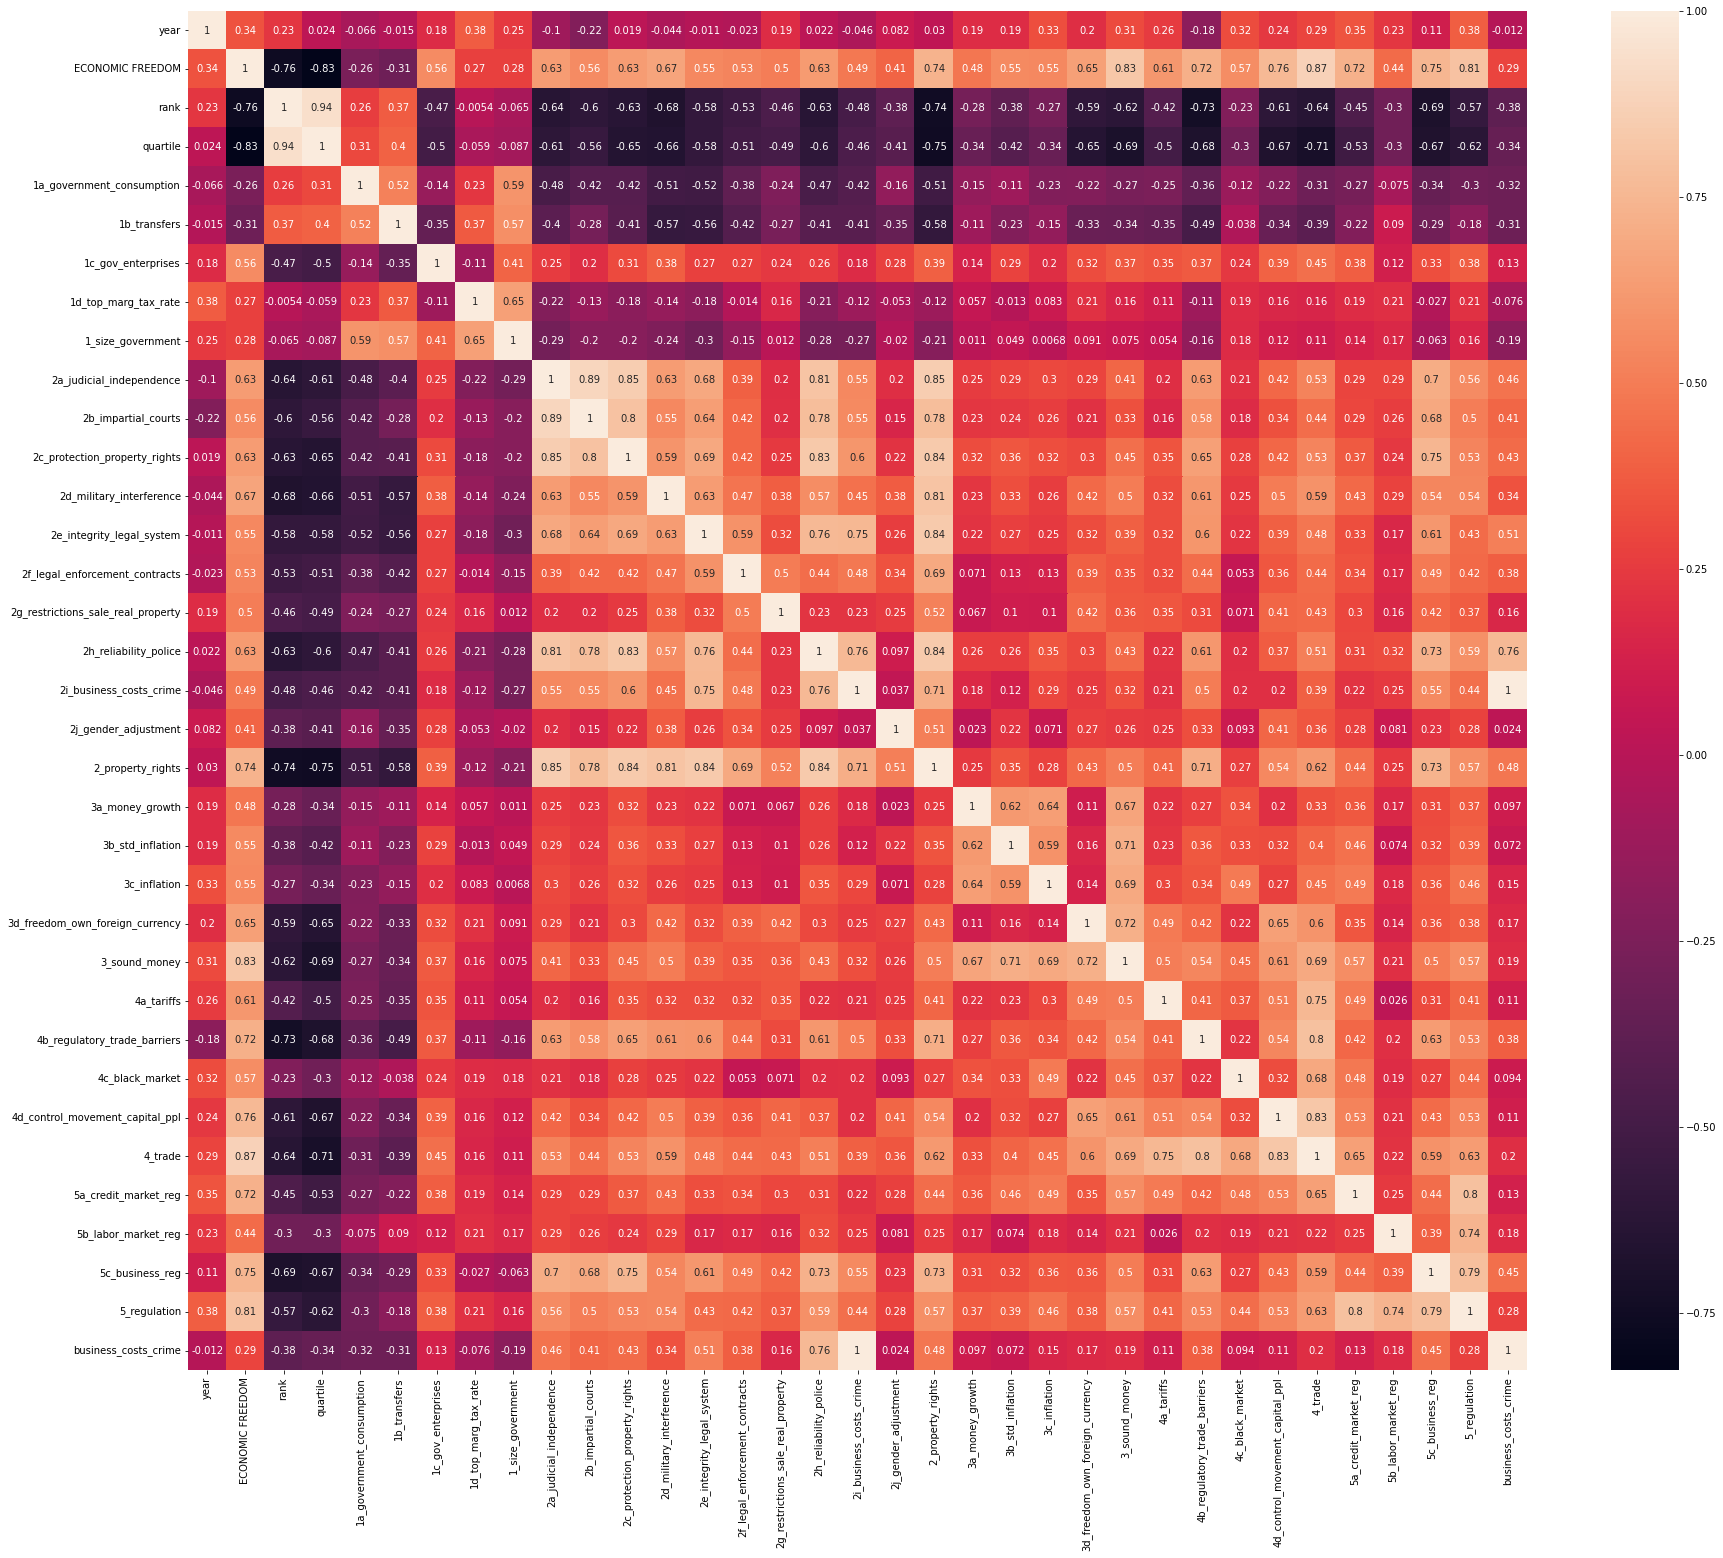

In [ ]:
corr_df = df_efw.corr(method='pearson') #method= standard correlation coefficient, hay otros metodos pero este es el mas popular

plt.figure(figsize=(30, 25))

sns.heatmap(corr_df
            ,annot=True
            )
plt.show()

In [ ]:
df_efw = df_efw.drop(['2h_reliability_police', '2i_business_costs_crime'], axis=1)

df_efw

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation,business_costs_crime
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901,6.215401
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992,6.737383
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500,4.291197
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019,4.133832
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069,7.007654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970,TWN,Taiwan,6.40,22.0,2.0,4.561765,10.000000,2.0,NaN,...,5.733333,NaN,9.40000,2.000000,5.711111,3.698699,NaN,NaN,3.714163,5.888211
3709,1970,THA,Thailand,6.20,25.0,2.0,7.668155,10.000000,6.0,NaN,...,4.400000,NaN,10.00000,2.000000,5.466667,7.677678,NaN,NaN,5.092079,5.888211
3713,1970,TUN,Tunisia,4.44,47.0,4.0,5.687737,8.988691,0.0,NaN,...,3.533333,NaN,4.00000,0.000000,2.511111,5.449449,NaN,NaN,4.804833,5.888211
3719,1970,USA,United States,7.77,4.0,1.0,5.108942,7.980926,8.0,0.0,...,8.400000,NaN,10.00000,8.000000,8.800000,9.336003,4.347600,NaN,6.841801,5.888211


In [ ]:
len(df_efw)

2803

In [ ]:
df_efw.isna().sum()

year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1b_transfers                          194
1c_gov_enterprises                      0
1d_top_marg_tax_rate                  261
1_size_government                       0
2a_judicial_independence              693
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency   

In [ ]:
df_efw['1b_transfers'].describe()

count    2609.000000
mean        7.649024
std         2.138723
min         0.844687
25%         6.158038
50%         8.418998
75%         9.462711
max        10.000000
Name: 1b_transfers, dtype: float64

In [ ]:
df_efw['transfers'] = df_efw['1b_transfers'].fillna(df_efw['1b_transfers'].mean())
df_efw.isna().sum()

year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1b_transfers                          194
1c_gov_enterprises                      0
1d_top_marg_tax_rate                  261
1_size_government                       0
2a_judicial_independence              693
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency   

In [ ]:
df_efw = df_efw.drop(['1b_transfers'], axis=1)

df_efw

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,...,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation,business_costs_crime,transfers
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,8.0,8.0,7.935564,...,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901,6.215401,7.509902
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,0.0,4.5,3.616782,...,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992,6.737383,7.817129
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,0.0,9.5,6.496685,...,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500,4.291197,8.886739
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.0,4.0,5.346056,...,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019,4.133832,6.048930
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,8.0,5.0,7.003310,...,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069,7.007654,7.748532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970,TWN,Taiwan,6.40,22.0,2.0,4.561765,2.0,NaN,5.520588,...,NaN,9.40000,2.000000,5.711111,3.698699,NaN,NaN,3.714163,5.888211,10.000000
3709,1970,THA,Thailand,6.20,25.0,2.0,7.668155,6.0,NaN,7.889385,...,NaN,10.00000,2.000000,5.466667,7.677678,NaN,NaN,5.092079,5.888211,10.000000
3713,1970,TUN,Tunisia,4.44,47.0,4.0,5.687737,0.0,NaN,4.892143,...,NaN,4.00000,0.000000,2.511111,5.449449,NaN,NaN,4.804833,5.888211,8.988691
3719,1970,USA,United States,7.77,4.0,1.0,5.108942,8.0,0.0,5.272467,...,NaN,10.00000,8.000000,8.800000,9.336003,4.347600,NaN,6.841801,5.888211,7.980926


In [ ]:
df_efw.isna().sum()


year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1d_top_marg_tax_rate                  261
1_size_government                       0
2a_judicial_independence              693
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                     

In [ ]:
df_efw['1d_top_marg_tax_rate'].describe()

count    2542.000000
mean        5.807238
std         2.595447
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: 1d_top_marg_tax_rate, dtype: float64

In [ ]:
df_efw['top_marg_tax_rate'] = df_efw['1d_top_marg_tax_rate'].fillna(df_efw['1d_top_marg_tax_rate'].mean())
df_efw = df_efw.drop(['1d_top_marg_tax_rate'], axis=1)



In [ ]:
df_efw.isna().sum()


year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1_size_government                       0
2a_judicial_independence              693
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                           0
4a_tariffs                        

In [ ]:
df_efw['2a_judicial_independence'].describe()

count    2110.000000
mean        5.013626
std         2.262756
min         0.000000
25%         3.214663
50%         4.711902
75%         6.822563
max         9.816667
Name: 2a_judicial_independence, dtype: float64

In [ ]:
df_efw['judicial_independence'] = df_efw['2a_judicial_independence'].fillna(df_efw['2a_judicial_independence'].mean())
df_efw = df_efw.drop(['2a_judicial_independence'], axis=1)

In [ ]:
df_efw.isna().sum()


year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1_size_government                       0
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                           0
4a_tariffs                              0
4b_regulatory_trade_barriers      

In [ ]:
df_efw['5c_business_reg'].describe()

count    2259.000000
mean        6.191478
std         1.256476
min         2.009841
25%         5.398324
50%         6.171499
75%         6.990564
max         9.503739
Name: 5c_business_reg, dtype: float64

In [ ]:
df_efw['business_reg'] = df_efw['5c_business_reg'].fillna(df_efw['5c_business_reg'].mean())
df_efw = df_efw.drop(['5c_business_reg'], axis=1)
df_efw.isna().sum()


year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1_size_government                       0
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                           0
4a_tariffs                              0
4b_regulatory_trade_barriers      

In [ ]:
df_efw['labor_market_reg'] = df_efw['5b_labor_market_reg'].fillna(df_efw['5b_labor_market_reg'].mean())
df_efw = df_efw.drop(['5b_labor_market_reg'], axis=1)
df_efw.isna().sum()

year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1_size_government                       0
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                           0
4a_tariffs                              0
4b_regulatory_trade_barriers      

In [ ]:
df_efw['regulatory_trade_barriers'] = df_efw['4b_regulatory_trade_barriers'].fillna(df_efw['4b_regulatory_trade_barriers'].mean())
df_efw = df_efw.drop(['4b_regulatory_trade_barriers'], axis=1)
df_efw.isna().sum()

year                                    0
ISO_code                                0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1c_gov_enterprises                      0
1_size_government                       0
2b_impartial_courts                   333
2c_protection_property_rights         350
2d_military_interference              338
2e_integrity_legal_system             330
2f_legal_enforcement_contracts        511
2g_restrictions_sale_real_property    524
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                           0
4a_tariffs                              0
4c_black_market                   

In [ ]:
df_efw['2g_restrictions_sale_real_property'].describe()

count    2279.000000
mean        7.029502
std         2.016433
min         0.000000
25%         6.001264
50%         7.501051
75%         8.506084
max         9.981101
Name: 2g_restrictions_sale_real_property, dtype: float64

In [ ]:
df_efw['restrictions_sale_real_property'] = df_efw['2g_restrictions_sale_real_property'].fillna(df_efw['2g_restrictions_sale_real_property'].mean())
df_efw = df_efw.drop(['2g_restrictions_sale_real_property'], axis=1)
df_efw.isna().sum()

year                                 0
ISO_code                             0
countries                            0
ECONOMIC FREEDOM                     0
rank                                 0
quartile                             0
1a_government_consumption            0
1c_gov_enterprises                   0
1_size_government                    0
2b_impartial_courts                333
2c_protection_property_rights      350
2d_military_interference           338
2e_integrity_legal_system          330
2f_legal_enforcement_contracts     511
2j_gender_adjustment                 0
2_property_rights                    0
3a_money_growth                      0
3b_std_inflation                     0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
3_sound_money                        0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
4_trade                              0
5a_credit_market_reg     

In [ ]:
df_efw['2f_legal_enforcement_contracts'].describe()

count    2292.000000
mean        4.452644
std         1.715696
min         0.000000
25%         3.376287
50%         4.477206
75%         5.565038
max         8.478714
Name: 2f_legal_enforcement_contracts, dtype: float64

In [ ]:
df_efw['legal_enforcement_contracts'] = df_efw['2f_legal_enforcement_contracts'].fillna(df_efw['2f_legal_enforcement_contracts'].mean())
df_efw = df_efw.drop(['2f_legal_enforcement_contracts'], axis=1)
df_efw.isna().sum()

year                                 0
ISO_code                             0
countries                            0
ECONOMIC FREEDOM                     0
rank                                 0
quartile                             0
1a_government_consumption            0
1c_gov_enterprises                   0
1_size_government                    0
2b_impartial_courts                333
2c_protection_property_rights      350
2d_military_interference           338
2e_integrity_legal_system          330
2j_gender_adjustment                 0
2_property_rights                    0
3a_money_growth                      0
3b_std_inflation                     0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
3_sound_money                        0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
4_trade                              0
5a_credit_market_reg                 0
5_regulation             

In [ ]:
df_efw['2b_impartial_courts'].describe()

count    2470.000000
mean        4.675109
std         1.772808
min         0.000000
25%         3.340154
50%         4.333333
75%         5.857461
max         9.686000
Name: 2b_impartial_courts, dtype: float64

In [ ]:
df_efw['impartial_courts'] = df_efw['2b_impartial_courts'].fillna(df_efw['2b_impartial_courts'].mean())
df_efw = df_efw.drop(['2b_impartial_courts'], axis=1)
df_efw.isna().sum()

year                                 0
ISO_code                             0
countries                            0
ECONOMIC FREEDOM                     0
rank                                 0
quartile                             0
1a_government_consumption            0
1c_gov_enterprises                   0
1_size_government                    0
2c_protection_property_rights      350
2d_military_interference           338
2e_integrity_legal_system          330
2j_gender_adjustment                 0
2_property_rights                    0
3a_money_growth                      0
3b_std_inflation                     0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
3_sound_money                        0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
4_trade                              0
5a_credit_market_reg                 0
5_regulation                         0
business_costs_crime     

In [ ]:
df_efw['2e_integrity_legal_system'].describe()

count    2473.000000
mean        6.210888
std         2.367775
min         0.000000
25%         4.166667
50%         6.666667
75%         8.333333
max        10.000000
Name: 2e_integrity_legal_system, dtype: float64

In [ ]:
df_efw['integrity_legal_system'] = df_efw['2e_integrity_legal_system'].fillna(df_efw['2e_integrity_legal_system'].mean())
df_efw = df_efw.drop(['2e_integrity_legal_system'], axis=1)
df_efw.isna().sum()

year                                 0
ISO_code                             0
countries                            0
ECONOMIC FREEDOM                     0
rank                                 0
quartile                             0
1a_government_consumption            0
1c_gov_enterprises                   0
1_size_government                    0
2c_protection_property_rights      350
2d_military_interference           338
2j_gender_adjustment                 0
2_property_rights                    0
3a_money_growth                      0
3b_std_inflation                     0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
3_sound_money                        0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
4_trade                              0
5a_credit_market_reg                 0
5_regulation                         0
business_costs_crime                 0
transfers                

In [ ]:
df_efw['2d_military_interference'].describe()

count    2465.000000
mean        6.516942
std         2.783641
min         0.000000
25%         4.382896
50%         6.666667
75%         8.333333
max        10.000000
Name: 2d_military_interference, dtype: float64

In [ ]:
df_efw['military_interference'] = df_efw['2d_military_interference'].fillna(df_efw['2d_military_interference'].mean())
df_efw = df_efw.drop(['2d_military_interference'], axis=1)
df_efw.isna().sum()

year                                 0
ISO_code                             0
countries                            0
ECONOMIC FREEDOM                     0
rank                                 0
quartile                             0
1a_government_consumption            0
1c_gov_enterprises                   0
1_size_government                    0
2c_protection_property_rights      350
2j_gender_adjustment                 0
2_property_rights                    0
3a_money_growth                      0
3b_std_inflation                     0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
3_sound_money                        0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
4_trade                              0
5a_credit_market_reg                 0
5_regulation                         0
business_costs_crime                 0
transfers                            0
top_marg_tax_rate        

In [ ]:
df_efw['2c_protection_property_rights'].describe()

count    2453.000000
mean        5.514871
std         1.982563
min         0.000000
25%         4.115102
50%         5.333193
75%         7.057639
max        10.000000
Name: 2c_protection_property_rights, dtype: float64

In [ ]:
df_efw['protection_property_rights'] = df_efw['2c_protection_property_rights'].fillna(df_efw['2c_protection_property_rights'].mean())
df_efw = df_efw.drop(['2c_protection_property_rights'], axis=1)
df_efw.isna().sum()

year                               0
ISO_code                           0
countries                          0
ECONOMIC FREEDOM                   0
rank                               0
quartile                           0
1a_government_consumption          0
1c_gov_enterprises                 0
1_size_government                  0
2j_gender_adjustment               0
2_property_rights                  0
3a_money_growth                    0
3b_std_inflation                   0
3c_inflation                       0
3d_freedom_own_foreign_currency    0
3_sound_money                      0
4a_tariffs                         0
4c_black_market                    0
4d_control_movement_capital_ppl    0
4_trade                            0
5a_credit_market_reg               0
5_regulation                       0
business_costs_crime               0
transfers                          0
top_marg_tax_rate                  0
judicial_independence              0
business_reg                       0
l

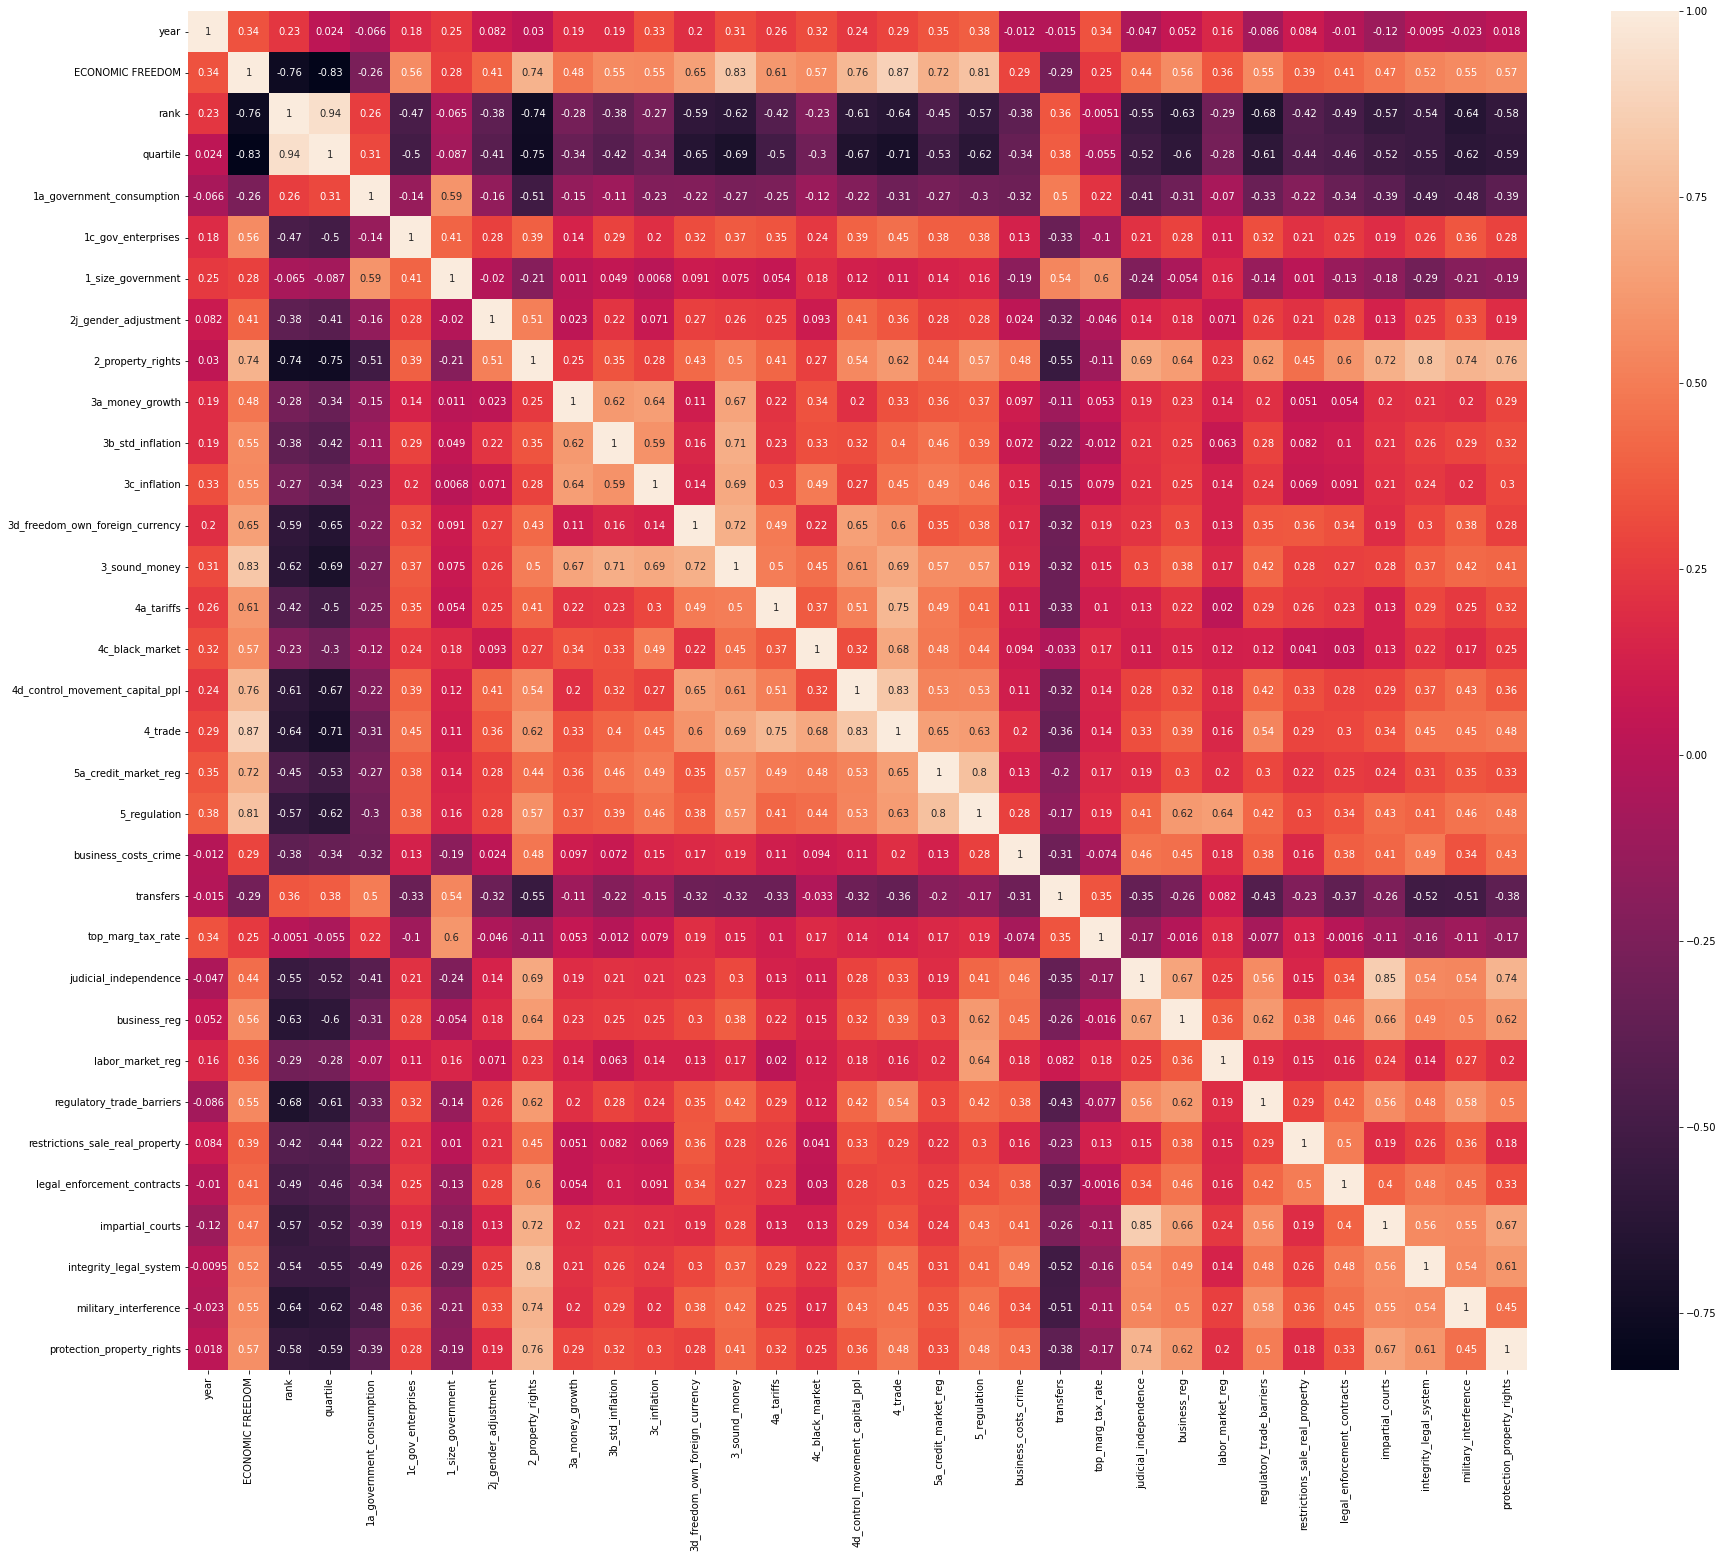

In [ ]:
corr_df = df_efw.corr(method='pearson') #method= standard correlation coefficient, hay otros metodos pero este es el mas popular

plt.figure(figsize=(30, 25))

sns.heatmap(corr_df
            ,annot=True
            )
plt.show()

In [ ]:
df_efw.columns

Index(['year', 'ISO_code', 'countries', 'ECONOMIC FREEDOM', 'rank', 'quartile',
       '1a_government_consumption', '1c_gov_enterprises', '1_size_government',
       '2j_gender_adjustment', '2_property_rights', '3a_money_growth',
       '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency',
       '3_sound_money', '4a_tariffs', '4c_black_market',
       '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg',
       '5_regulation', 'business_costs_crime', 'transfers',
       'top_marg_tax_rate', 'judicial_independence', 'business_reg',
       'labor_market_reg', 'regulatory_trade_barriers',
       'restrictions_sale_real_property', 'legal_enforcement_contracts',
       'impartial_courts', 'integrity_legal_system', 'military_interference',
       'protection_property_rights'],
      dtype='object')

In [ ]:
x = df_efw[['year',
       '1a_government_consumption', '1c_gov_enterprises', '1_size_government',
       '2j_gender_adjustment', '3a_money_growth',
       '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency',
        '4a_tariffs', '4c_black_market',
        'business_costs_crime', 'transfers',
       'top_marg_tax_rate', 'judicial_independence', 'business_reg',
       'labor_market_reg', 'regulatory_trade_barriers',
       'restrictions_sale_real_property', 'legal_enforcement_contracts'
       ]]

y = df_efw['ECONOMIC FREEDOM']

x.head(10)

,year,1a_government_consumption,1c_gov_enterprises,1_size_government,2j_gender_adjustment,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,4a_tariffs,4c_black_market,business_costs_crime,transfers,top_marg_tax_rate,judicial_independence,business_reg,labor_market_reg,regulatory_trade_barriers,restrictions_sale_real_property,legal_enforcement_contracts
0,2016,8.232353,8.0,7.935564,0.948718,8.986454,9.484575,9.74360,10.0,8.963556,10.00000,6.215401,7.509902,8.0,2.668222,6.705863,6.916278,7.489905,6.485287,4.387444
1,2016,2.150000,0.0,3.616782,0.820513,6.955962,8.339152,8.72046,5.0,6.872533,5.56391,6.737383,7.817129,4.5,4.186704,5.676956,5.029513,2.481294,6.626692,4.507538
2,2016,7.600000,0.0,6.496685,0.846154,9.385679,4.986742,3.05400,5.0,6.989244,10.00000,4.291197,8.886739,9.5,1.843129,4.930271,4.560325,2.024949,5.455882,2.302200
3,2016,5.335294,6.0,5.346056,0.769231,5.233264,5.224079,2.00000,10.0,6.421600,0.00000,4.133832,6.048930,4.0,3.689690,5.535831,5.151405,4.811105,6.857195,3.632872
4,2016,7.264706,8.0,7.003310,1.000000,9.078264,9.263496,9.74600,10.0,8.547556,10.00000,7.007654,7.748532,5.0,3.867379,6.797530,6.234630,7.194410,9.801963,5.196693
5,2016,4.511765,10.0,6.544178,1.000000,8.564838,9.500704,9.74462,10.0,8.820000,10.00000,6.790183,6.664948,5.0,8.766929,8.121631,7.698589,7.427103,8.205655,6.025331
6,2016,3.744118,10.0,5.086295,1.000000,8.033869,9.875451,9.82200,10.0,8.266133,10.00000,7.194909,3.101062,3.5,7.650855,7.419870,5.565118,8.254011,8.100494,6.220993
7,2016,6.320588,0.0,5.175449,0.717949,9.240398,6.649350,9.16420,5.0,7.973778,10.00000,7.280192,7.881208,6.5,5.676886,7.080078,6.076782,6.799052,9.830312,7.252962
8,2016,7.085294,7.0,8.281449,0.945946,8.654101,8.975514,9.93080,0.0,3.253067,10.00000,5.888211,9.040503,10.0,5.013626,7.523034,8.361606,8.105925,6.149350,4.699257
9,2016,3.688235,10.0,8.317485,0.536585,9.961596,8.215418,9.44040,10.0,8.523200,10.00000,7.287250,9.581704,10.0,6.822563,8.018774,6.619418,6.295595,8.855315,4.785814


##Converti los nombres en numeros de country y isocode lo elimine##

In [ ]:
x=pd.get_dummies(x)
x

,year,1a_government_consumption,1c_gov_enterprises,1_size_government,2j_gender_adjustment,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,4a_tariffs,4c_black_market,business_costs_crime,transfers,top_marg_tax_rate,judicial_independence,business_reg,labor_market_reg,regulatory_trade_barriers,restrictions_sale_real_property,legal_enforcement_contracts
0,2016,8.232353,8.0,7.935564,0.948718,8.986454,9.484575,9.74360,10.0,8.963556,10.00000,6.215401,7.509902,8.000000,2.668222,6.705863,6.916278,7.489905,6.485287,4.387444
1,2016,2.150000,0.0,3.616782,0.820513,6.955962,8.339152,8.72046,5.0,6.872533,5.56391,6.737383,7.817129,4.500000,4.186704,5.676956,5.029513,2.481294,6.626692,4.507538
2,2016,7.600000,0.0,6.496685,0.846154,9.385679,4.986742,3.05400,5.0,6.989244,10.00000,4.291197,8.886739,9.500000,1.843129,4.930271,4.560325,2.024949,5.455882,2.302200
3,2016,5.335294,6.0,5.346056,0.769231,5.233264,5.224079,2.00000,10.0,6.421600,0.00000,4.133832,6.048930,4.000000,3.689690,5.535831,5.151405,4.811105,6.857195,3.632872
4,2016,7.264706,8.0,7.003310,1.000000,9.078264,9.263496,9.74600,10.0,8.547556,10.00000,7.007654,7.748532,5.000000,3.867379,6.797530,6.234630,7.194410,9.801963,5.196693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970,4.561765,2.0,5.520588,0.962963,9.388788,9.208000,9.32000,10.0,5.733333,9.40000,5.888211,10.000000,5.807238,5.013626,6.191478,6.180524,6.351841,7.029502,4.452644
3709,1970,7.668155,6.0,7.889385,1.000000,9.647695,8.188000,9.00000,0.0,4.400000,10.00000,5.888211,10.000000,5.807238,5.013626,6.191478,6.180524,6.351841,7.029502,4.452644
3713,1970,5.687737,0.0,4.892143,0.666667,9.693250,9.164000,8.68000,0.0,3.533333,4.00000,5.888211,8.988691,5.807238,5.013626,6.191478,6.180524,6.351841,7.029502,4.452644
3719,1970,5.108942,8.0,5.272467,1.000000,9.745108,9.624000,8.98600,10.0,8.400000,10.00000,5.888211,7.980926,0.000000,5.013626,6.191478,4.347600,6.351841,7.029502,4.452644


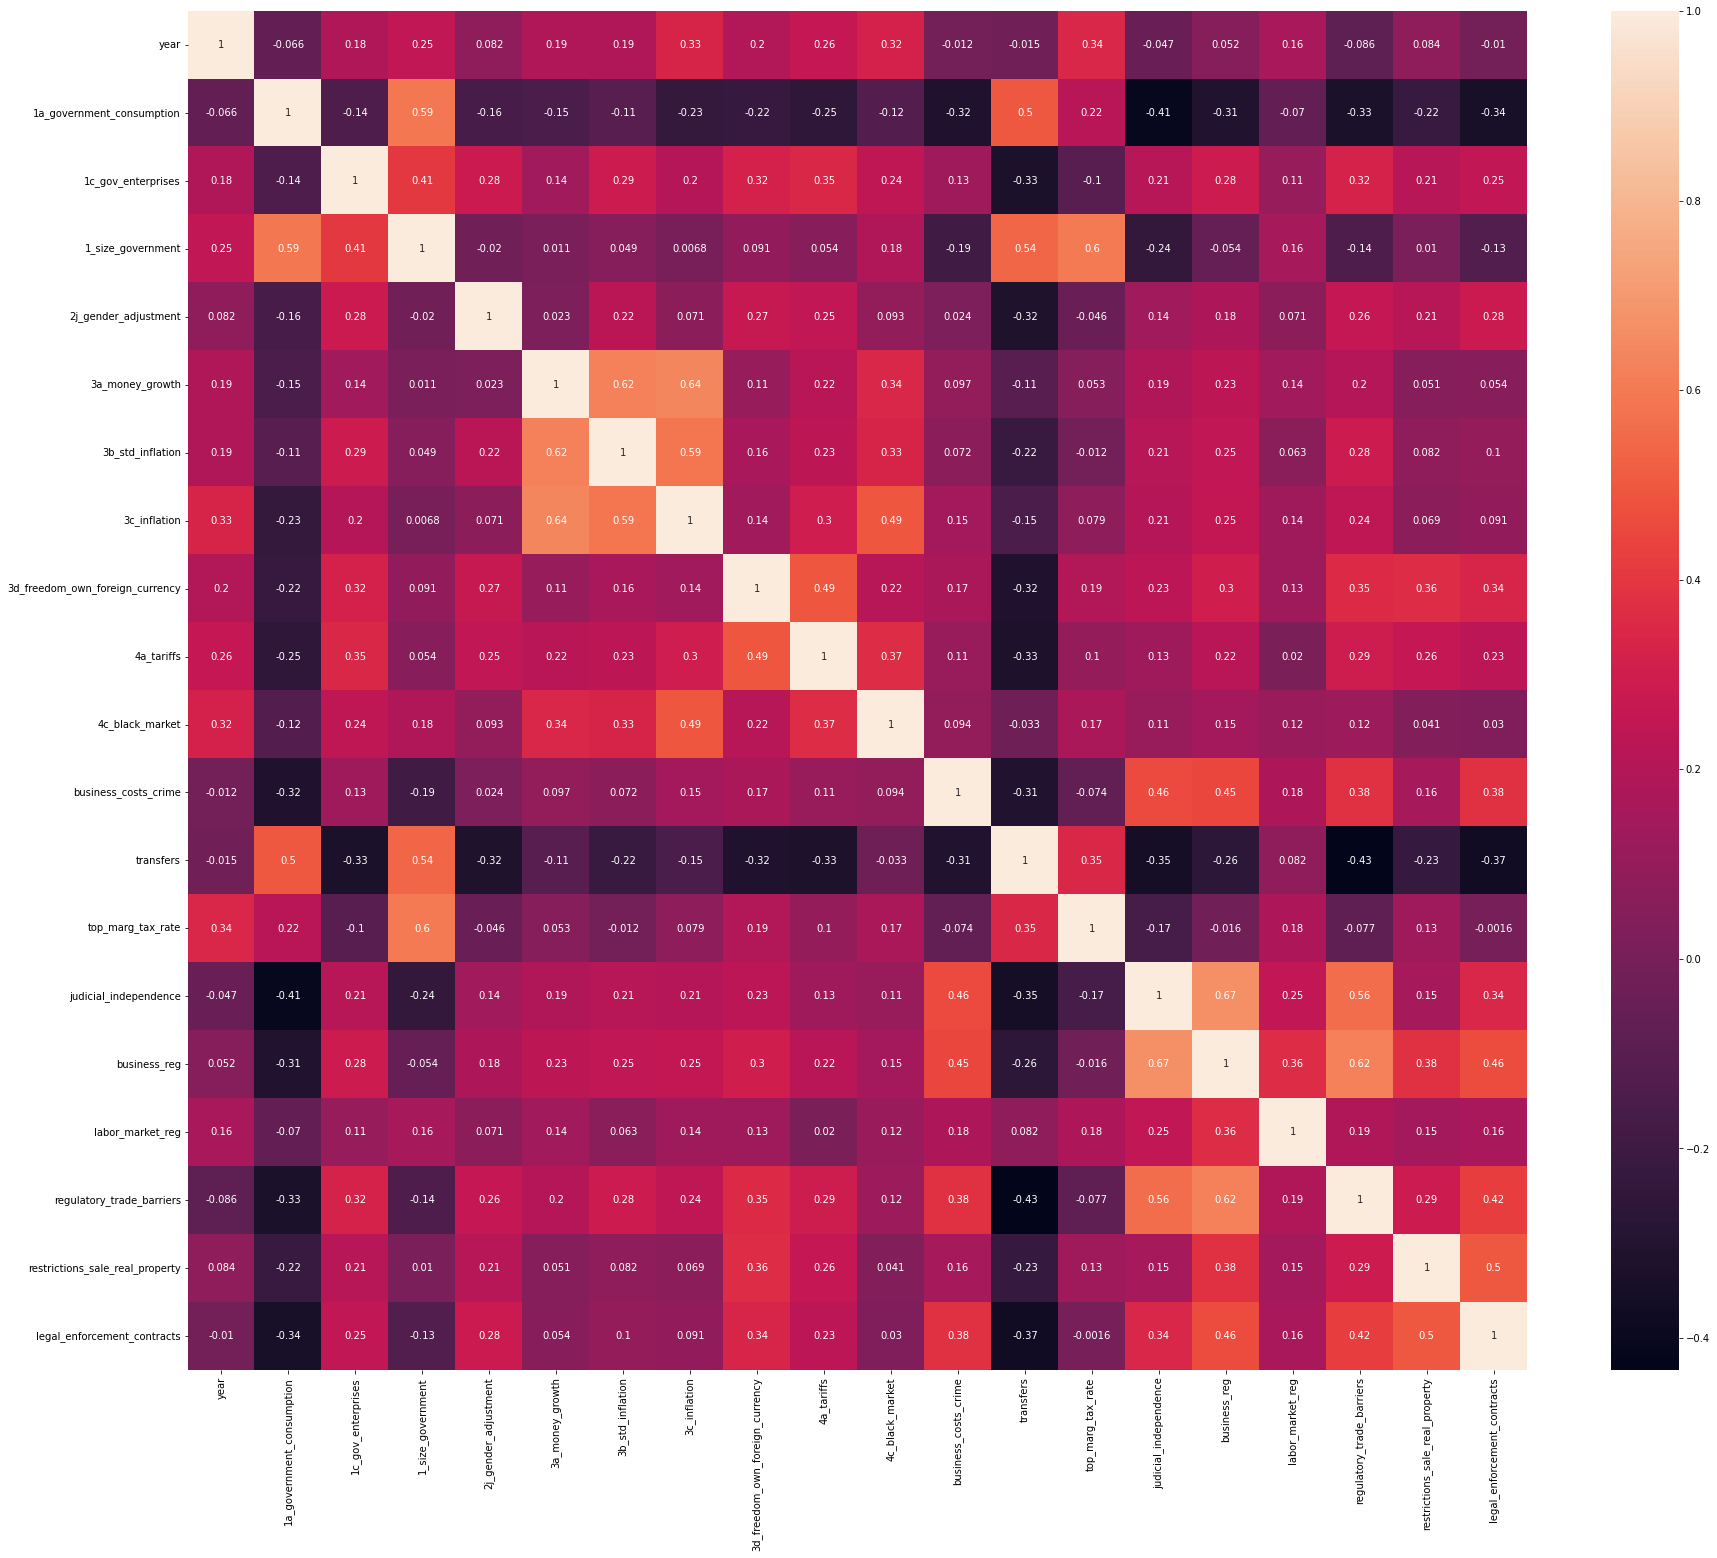

In [ ]:
corr_df = x.corr(method='pearson') #method= standard correlation coefficient, hay otros metodos pero este es el mas popular

plt.figure(figsize=(30, 25))

sns.heatmap(corr_df
            ,annot=True
            )
plt.show()

In [ ]:
x.dtypes

year                                 int64
1a_government_consumption          float64
1c_gov_enterprises                 float64
1_size_government                  float64
2j_gender_adjustment               float64
3a_money_growth                    float64
3b_std_inflation                   float64
3c_inflation                       float64
3d_freedom_own_foreign_currency    float64
4a_tariffs                         float64
4c_black_market                    float64
business_costs_crime               float64
transfers                          float64
top_marg_tax_rate                  float64
judicial_independence              float64
business_reg                       float64
labor_market_reg                   float64
regulatory_trade_barriers          float64
restrictions_sale_real_property    float64
legal_enforcement_contracts        float64
dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1234) 


##Como es un modelo de regresion y quiero predecir valores continuos, uso modelo lineal##

In [ ]:
clf= LinearRegression()



##Ccon este comando se entrena el modelo##

In [ ]:
clf.fit(x_train, y_train)

LinearRegression()

##En clf se guarda el modelo, ahora uso los valores de xtest para predecir##

In [ ]:
predicion_clf=clf.predict(x_test)

In [ ]:
r2_score(predicion_clf,y_test)

0.9454128449727628